In [104]:
import tensorflow as tf
import tensorflow_hub as hub
# For saving 'feature vectors' into a txt file
import numpy as np
# Glob for reading file names in a folder
import glob
import os.path
from tqdm import tqdm
import ntpath
import warnings
import cv2
from annoy import AnnoyIndex
from scipy import spatial
warnings.filterwarnings('ignore')
from operator import itemgetter

In [38]:
def load_img(path):
    # Reads the image file and returns data type of string
    img = tf.io.read_file(path)
    # Decodes the image to W x H x 3 shape tensor with type of uint8
    img = tf.io.decode_jpeg(img, channels=3)
    # Resizes the image to 224 x 224 x 3 shape tensor
    img = tf.image.resize_with_pad(img, 224, 224)
    # Converts the data type of uint8 to float32 by adding a new axis
    # img becomes 1 x 224 x 224 x 3 tensor with data type of float32
    # This is required for the mobilenet model we are using
    img = tf.image.convert_image_dtype(img,tf.float32)[tf.newaxis, ...]

    return img

In [50]:
def match_id(filename):
    product_id = '_'.join(filename.split('_')[:-1])
    return product_id

In [3]:
image_paths= glob.glob('D:\\Documents\\Semester3\\ADM\\A3\\Images\\*.jpg')

In [51]:
def get_image_feature_vectors(path):
    module_handle = "https://tfhub.dev/google/imagenet/mobilenet_v2_140_224/feature_vector/4"
    # Loads the module
    module = hub.load(module_handle)
    # Loops through all images in a local folder

    #print(path)
    # Loads and pre-process the image
    img = load_img(path)
    # Calculate the image feature vector of the img
    features = module(img)
    # Remove single-dimensional entries from the 'features' array  
    feature_set = np.squeeze(features)

    # Saves the image feature vectors into a file for later use
    outfile_name = os.path.basename(filename) + ".npz"

    out_path = os.path.join('D:/Documents/Semester3/ADM/Assignment 3/Images/Images_Scraped/',outfile_name)
    # Saves the 'feature_set' to a text file
    np.savetxt(out_path, feature_set, delimiter=',')

In [52]:
def get_features(img, image_path): 
     # Definition of module with using tfhub.dev
    module_handle = "https://tfhub.dev/google/imagenet/mobilenet_v2_140_224/feature_vector/4"
    # Loads the module
    module = hub.load(module_handle)
    features = module(img)
    # Remove single-dimensional entries from the 'features' array  
    feature_set = np.squeeze(features)
    #print(image_path)

    # Saves the image feature vectors into a file for later use
    outfile_name = os.path.basename(image_path) + ".npz"

    out_path = os.path.join('D:/Documents/Semester3/ADM/A3/Images/ImagesScraped/',outfile_name)
    # Saves the 'feature_set' to a text file
    np.savetxt(out_path, feature_set, delimiter=',')
    vector = np.loadtxt(out_path)
    return vector
    

In [61]:
image_paths= glob.glob('D:\\Documents\\Semester3\\ADM\\A3\\Images\\*.jpg')
vectorfiles = glob.glob('D:\\Documents\\Semester3\\ADM\\A3\\Images\\ImagesScraped\\*.npz')
# compute styles
image_style_embeddings = {}

for image_path in tqdm(image_paths): 
    image_tensor = load_img(image_path)
    vector = get_features(image_tensor, image_path)
    image_style_embeddings[ntpath.basename(image_path)] = vector
    

  0%|                                                                                          | 0/107 [00:00<?, ?it/s]

  1%|▊                                                                                 | 1/107 [00:12<22:55, 12.97s/it]

  2%|█▌                                                                                | 2/107 [00:24<22:09, 12.66s/it]

  3%|██▎                                                                               | 3/107 [00:36<21:35, 12.46s/it]

  4%|███                                                                               | 4/107 [00:48<21:06, 12.30s/it]

  5%|███▊                                                                              | 5/107 [01:00<20:42, 12.18s/it]

  6%|████▌                                                                             | 6/107 [01:12<20:22, 12.11s/it]

  7%|█████▎                                                                            | 7/107 [01:24<20:02, 12.03s/it]

  7%|██████▏                                                                           | 8/107 [01:36<19:45, 11.98s/it]

  8%|██████▉                                                                           | 9/107 [01:48<19:28, 11.92s/it]

  9%|███████▌                                                                         | 10/107 [02:00<19:15, 11.91s/it]

 10%|████████▎                                                                        | 11/107 [02:12<19:05, 11.94s/it]

 11%|█████████                                                                        | 12/107 [02:23<18:50, 11.90s/it]

 12%|█████████▊                                                                       | 13/107 [02:36<18:46, 11.98s/it]

 13%|██████████▌                                                                      | 14/107 [02:47<18:29, 11.93s/it]

 14%|███████████▎                                                                     | 15/107 [02:59<18:19, 11.95s/it]

 15%|████████████                                                                     | 16/107 [03:11<18:10, 11.98s/it]

 16%|████████████▊                                                                    | 17/107 [03:23<17:53, 11.93s/it]

 17%|█████████████▋                                                                   | 18/107 [03:35<17:37, 11.89s/it]

 18%|██████████████▍                                                                  | 19/107 [03:47<17:29, 11.93s/it]

 19%|███████████████▏                                                                 | 20/107 [03:59<17:12, 11.87s/it]

 20%|███████████████▉                                                                 | 21/107 [04:11<17:06, 11.94s/it]

 21%|████████████████▋                                                                | 22/107 [04:23<16:54, 11.94s/it]

 21%|█████████████████▍                                                               | 23/107 [04:35<16:50, 12.03s/it]

 22%|██████████████████▏                                                              | 24/107 [04:47<16:41, 12.07s/it]

 23%|██████████████████▉                                                              | 25/107 [04:59<16:24, 12.00s/it]

 24%|███████████████████▋                                                             | 26/107 [05:11<16:06, 11.93s/it]

 25%|████████████████████▍                                                            | 27/107 [05:23<15:53, 11.92s/it]

 26%|█████████████████████▏                                                           | 28/107 [05:35<15:44, 11.96s/it]

 27%|█████████████████████▉                                                           | 29/107 [05:47<15:32, 11.95s/it]

 28%|██████████████████████▋                                                          | 30/107 [05:59<15:17, 11.92s/it]

 29%|███████████████████████▍                                                         | 31/107 [06:11<15:14, 12.03s/it]

 30%|████████████████████████▏                                                        | 32/107 [06:23<15:10, 12.15s/it]

 31%|████████████████████████▉                                                        | 33/107 [06:35<14:58, 12.14s/it]

 32%|█████████████████████████▋                                                       | 34/107 [06:48<15:07, 12.44s/it]

 33%|██████████████████████████▍                                                      | 35/107 [07:01<15:02, 12.53s/it]

 34%|███████████████████████████▎                                                     | 36/107 [07:13<14:35, 12.33s/it]

 35%|████████████████████████████                                                     | 37/107 [07:25<14:24, 12.34s/it]

 36%|████████████████████████████▊                                                    | 38/107 [07:37<14:01, 12.19s/it]

 36%|█████████████████████████████▌                                                   | 39/107 [07:50<14:04, 12.43s/it]

 37%|██████████████████████████████▎                                                  | 40/107 [08:03<13:52, 12.43s/it]

 38%|███████████████████████████████                                                  | 41/107 [08:15<13:42, 12.47s/it]

 39%|███████████████████████████████▊                                                 | 42/107 [08:28<13:25, 12.40s/it]

 40%|████████████████████████████████▌                                                | 43/107 [08:40<13:06, 12.29s/it]

 41%|█████████████████████████████████▎                                               | 44/107 [08:51<12:46, 12.16s/it]

 42%|██████████████████████████████████                                               | 45/107 [09:04<12:37, 12.22s/it]

 43%|██████████████████████████████████▊                                              | 46/107 [09:16<12:30, 12.31s/it]

 44%|███████████████████████████████████▌                                             | 47/107 [09:29<12:28, 12.47s/it]

 45%|████████████████████████████████████▎                                            | 48/107 [09:42<12:25, 12.63s/it]

 46%|█████████████████████████████████████                                            | 49/107 [09:54<12:03, 12.47s/it]

 47%|█████████████████████████████████████▊                                           | 50/107 [10:07<11:54, 12.54s/it]

 48%|██████████████████████████████████████▌                                          | 51/107 [10:19<11:41, 12.53s/it]

 49%|███████████████████████████████████████▎                                         | 52/107 [10:32<11:28, 12.52s/it]

 50%|████████████████████████████████████████                                         | 53/107 [10:44<11:05, 12.33s/it]

 50%|████████████████████████████████████████▉                                        | 54/107 [10:56<10:45, 12.18s/it]

 51%|█████████████████████████████████████████▋                                       | 55/107 [11:08<10:40, 12.32s/it]

 52%|██████████████████████████████████████████▍                                      | 56/107 [11:20<10:20, 12.18s/it]

 53%|███████████████████████████████████████████▏                                     | 57/107 [11:33<10:21, 12.43s/it]

 54%|███████████████████████████████████████████▉                                     | 58/107 [11:47<10:26, 12.78s/it]

 55%|████████████████████████████████████████████▋                                    | 59/107 [12:00<10:25, 13.02s/it]

 56%|█████████████████████████████████████████████▍                                   | 60/107 [12:13<10:13, 13.06s/it]

 57%|██████████████████████████████████████████████▏                                  | 61/107 [12:26<09:46, 12.75s/it]

 58%|██████████████████████████████████████████████▉                                  | 62/107 [12:38<09:34, 12.78s/it]

 59%|███████████████████████████████████████████████▋                                 | 63/107 [12:51<09:19, 12.71s/it]

 60%|████████████████████████████████████████████████▍                                | 64/107 [13:03<08:55, 12.45s/it]

 61%|█████████████████████████████████████████████████▏                               | 65/107 [13:14<08:32, 12.20s/it]

 62%|█████████████████████████████████████████████████▉                               | 66/107 [13:26<08:19, 12.17s/it]

 63%|██████████████████████████████████████████████████▋                              | 67/107 [13:38<08:04, 12.12s/it]

 64%|███████████████████████████████████████████████████▍                             | 68/107 [13:50<07:50, 12.06s/it]

 64%|████████████████████████████████████████████████████▏                            | 69/107 [14:03<07:43, 12.20s/it]

 65%|████████████████████████████████████████████████████▉                            | 70/107 [14:16<07:42, 12.49s/it]

 66%|█████████████████████████████████████████████████████▋                           | 71/107 [14:29<07:36, 12.67s/it]

 67%|██████████████████████████████████████████████████████▌                          | 72/107 [14:42<07:20, 12.60s/it]

 68%|███████████████████████████████████████████████████████▎                         | 73/107 [14:55<07:18, 12.91s/it]

 69%|████████████████████████████████████████████████████████                         | 74/107 [15:08<07:03, 12.84s/it]

 70%|████████████████████████████████████████████████████████▊                        | 75/107 [15:21<06:56, 13.02s/it]

 71%|█████████████████████████████████████████████████████████▌                       | 76/107 [15:34<06:43, 13.00s/it]

 72%|██████████████████████████████████████████████████████████▎                      | 77/107 [15:46<06:19, 12.65s/it]

 73%|███████████████████████████████████████████████████████████                      | 78/107 [15:59<06:08, 12.70s/it]

 74%|███████████████████████████████████████████████████████████▊                     | 79/107 [16:11<05:48, 12.46s/it]

 75%|████████████████████████████████████████████████████████████▌                    | 80/107 [16:23<05:31, 12.28s/it]

 76%|█████████████████████████████████████████████████████████████▎                   | 81/107 [16:35<05:16, 12.16s/it]

 77%|██████████████████████████████████████████████████████████████                   | 82/107 [16:46<05:01, 12.05s/it]

 78%|██████████████████████████████████████████████████████████████▊                  | 83/107 [16:59<04:51, 12.15s/it]

 79%|███████████████████████████████████████████████████████████████▌                 | 84/107 [17:11<04:36, 12.02s/it]

 79%|████████████████████████████████████████████████████████████████▎                | 85/107 [17:23<04:26, 12.10s/it]

 80%|█████████████████████████████████████████████████████████████████                | 86/107 [17:36<04:21, 12.43s/it]

 81%|█████████████████████████████████████████████████████████████████▊               | 87/107 [17:49<04:11, 12.58s/it]

 82%|██████████████████████████████████████████████████████████████████▌              | 88/107 [18:01<03:56, 12.46s/it]

 83%|███████████████████████████████████████████████████████████████████▎             | 89/107 [18:13<03:41, 12.30s/it]

 84%|████████████████████████████████████████████████████████████████████▏            | 90/107 [18:26<03:31, 12.42s/it]

 85%|████████████████████████████████████████████████████████████████████▉            | 91/107 [18:38<03:16, 12.29s/it]

 86%|█████████████████████████████████████████████████████████████████████▋           | 92/107 [18:50<03:03, 12.22s/it]

 87%|██████████████████████████████████████████████████████████████████████▍          | 93/107 [19:02<02:50, 12.17s/it]

 88%|███████████████████████████████████████████████████████████████████████▏         | 94/107 [19:14<02:39, 12.27s/it]

 89%|███████████████████████████████████████████████████████████████████████▉         | 95/107 [19:27<02:28, 12.40s/it]

 90%|████████████████████████████████████████████████████████████████████████▋        | 96/107 [19:39<02:15, 12.34s/it]

 91%|█████████████████████████████████████████████████████████████████████████▍       | 97/107 [19:52<02:05, 12.51s/it]

 92%|██████████████████████████████████████████████████████████████████████████▏      | 98/107 [20:05<01:52, 12.48s/it]

 93%|██████████████████████████████████████████████████████████████████████████▉      | 99/107 [20:17<01:39, 12.48s/it]

 93%|██████████████████████████████████████████████████████████████████████████▊     | 100/107 [20:29<01:25, 12.27s/it]

 94%|███████████████████████████████████████████████████████████████████████████▌    | 101/107 [20:41<01:13, 12.32s/it]

 95%|████████████████████████████████████████████████████████████████████████████▎   | 102/107 [20:53<01:00, 12.19s/it]

 96%|█████████████████████████████████████████████████████████████████████████████   | 103/107 [21:05<00:48, 12.19s/it]

 97%|█████████████████████████████████████████████████████████████████████████████▊  | 104/107 [21:18<00:36, 12.24s/it]

 98%|██████████████████████████████████████████████████████████████████████████████▌ | 105/107 [21:30<00:24, 12.20s/it]

 99%|███████████████████████████████████████████████████████████████████████████████▎| 106/107 [21:42<00:12, 12.13s/it]

100%|████████████████████████████████████████████████████████████████████████████████| 107/107 [21:55<00:00, 12.29s/it]


In [193]:
def cluster():
    print("-------Annoy Index Generation----------------")
    # Defining data structures as empty dict
    file_index_to_file_name = {}
    file_index_to_file_vector = {}
    file_index_to_product_id = {}
    # Configuring annoy parameters
    dims = 1792
    n_nearest_neighbors = 20
    trees = 10000
    # Reads all file names which stores feature vectors
    allfiles = glob.glob('D:\\Documents\\Semester3\\ADM\\A3\\Images\\ImagesScraped\\*.npz')

    t = AnnoyIndex(dims, metric='angular')
    
    for file_index, i in enumerate(allfiles):
    # Reads feature vectors and assigns them into the file_vector 
        file_vector = np.loadtxt(i)

        # Assigns file_name, feature_vectors and corresponding product_id
        file_name = os.path.basename(i).split('.')[0]
        file_index_to_file_name[file_index] = file_name
        file_index_to_file_vector[file_index] = file_vector
        file_index_to_product_id[file_index] = match_id(file_name)

        # Adds image feature vectors into annoy index   
        t.add_item(file_index, file_vector)

        print("---------------------------------")
        print("Annoy index     : %s" %file_index)
        print("Image file name : %s" %file_name)
        print("Product id      : %s" %file_index_to_product_id[file_index])
        #print("--- %.2f minutes passed ---------" % ((time.time() - start_time)/60))


    # Builds annoy index
    t.build(trees)

    print ("Step.1 - ANNOY index generation - Finished")
    print ("Step.2 - Similarity score calculation - Started ") 
  
    global named_nearest_neighbors
    named_nearest_neighbors = []

  # Loops through all indexed items
    for i in file_index_to_file_name.keys():

    # Assigns master file_name, image feature vectors and product id values
        master_file_name = file_index_to_file_name[i]
        master_vector = file_index_to_file_vector[i]
        master_product_id = file_index_to_product_id[i]

        # Calculates the nearest neighbors of the master item
        nearest_neighbors = t.get_nns_by_item(i, n_nearest_neighbors)

        # Loops through the nearest neighbors of the master item
        for j in nearest_neighbors:

            # Assigns file_name, image feature vectors and product id values of the similar item
            neighbor_file_name = file_index_to_file_name[j]
            neighbor_file_vector = file_index_to_file_vector[j]
            neighbor_product_id = file_index_to_product_id[j]

            # Calculates the similarity score of the similar item
            similarity = 1 - spatial.distance.cosine(master_vector, neighbor_file_vector)
            rounded_similarity = int((similarity * 10000)) / 10000.0

            # Appends master product id with the similarity score 
            # and the product id of the similar items
            named_nearest_neighbors.append({
            'similarity': rounded_similarity,
            'master_pi': master_product_id,
            'similar_pi': neighbor_product_id})
#     print(named_nearest_neighbors)
#     print(type(named_nearest_neighbors))
            
#     return named_nearest_neighbors

In [143]:
image_paths = glob.glob('D:\\Documents\\Semester3\\ADM\\A3\\Images\\*.jpg')
print(f'Founnd [{len(image_paths)}] images')

images = []
for image_path in image_paths:
    image = cv2.imread(image_path, 3)
    b,g,r = cv2.split(image)           # get b, g, r
    image = cv2.merge([r,g,b])         # switch it to r, g, b
    image = cv2.resize(image, (200, 200))
    product_id = match_id(ntpath.basename(image_path))
    images.append({
      'image_path' : ntpath.basename(image_path),
        'image' : image,
       'product_id':product_id
    })
#     images['image_path'] = ntpath.basename(image_path)
#     images['image'] = image
#     #images[ntpath.basename(image_path)] = image
#     product_id = match_id(ntpath.basename(image_path))
#     images['product_id'] = product_id

Founnd [107] images


In [194]:
cluster()

-------Annoy Index Generation----------------
Printing file index
0
---------------------------------
Annoy index     : 0
Image file name : 10531_0
Product id      : 10531
Printing file index
1
---------------------------------
Annoy index     : 1
Image file name : 11485_0
Product id      : 11485
Printing file index
2
---------------------------------
Annoy index     : 2
Image file name : 14058_0
Product id      : 14058
Printing file index
3
---------------------------------
Annoy index     : 3
Image file name : 15759_0
Product id      : 15759
Printing file index
4
---------------------------------
Annoy index     : 4
Image file name : 18337_0
Product id      : 18337
Printing file index
5
---------------------------------
Annoy index     : 5
Image file name : 23158_0
Product id      : 23158
Printing file index
6
---------------------------------
Annoy index     : 6
Image file name : 26567_0
Product id      : 26567
Printing file index
7
---------------------------------
Annoy index     

---------------------------------
Annoy index     : 68
Image file name : 62766_0
Product id      : 62766
Printing file index
69
---------------------------------
Annoy index     : 69
Image file name : 65038_0
Product id      : 65038
Printing file index
70
---------------------------------
Annoy index     : 70
Image file name : 65501_0
Product id      : 65501
Printing file index
71
---------------------------------
Annoy index     : 71
Image file name : 65842_0
Product id      : 65842
Printing file index
72
---------------------------------
Annoy index     : 72
Image file name : 66504_0
Product id      : 66504
Printing file index
73
---------------------------------
Annoy index     : 73
Image file name : 67000_0
Product id      : 67000
Printing file index
74
---------------------------------
Annoy index     : 74
Image file name : 67000_1
Product id      : 67000
Printing file index
75
---------------------------------
Annoy index     : 75
Image file name : 67000_2
Product id      : 67000

In [91]:
#named_nearest_neighbors=[]
cluster()
print("Printing named_nearest_neighbors")
print(named_nearest_neighbors)
print(type(named_nearest_neighbors))

-------Annoy Index Generation----------------
---------------------------------
Annoy index     : 0
Image file name : 10531_0
Product id      : 10531
---------------------------------
Annoy index     : 1
Image file name : 11485_0
Product id      : 11485
---------------------------------
Annoy index     : 2
Image file name : 14058_0
Product id      : 14058
---------------------------------
Annoy index     : 3
Image file name : 15759_0
Product id      : 15759
---------------------------------
Annoy index     : 4
Image file name : 18337_0
Product id      : 18337
---------------------------------
Annoy index     : 5
Image file name : 23158_0
Product id      : 23158
---------------------------------
Annoy index     : 6
Image file name : 26567_0
Product id      : 26567
---------------------------------
Annoy index     : 7
Image file name : 26567_1
Product id      : 26567
---------------------------------
Annoy index     : 8
Image file name : 26567_2
Product id      : 26567
------------------

---------------------------------
Annoy index     : 84
Image file name : 69856_0
Product id      : 69856
---------------------------------
Annoy index     : 85
Image file name : 71586_0
Product id      : 71586
---------------------------------
Annoy index     : 86
Image file name : 72863_0
Product id      : 72863
---------------------------------
Annoy index     : 87
Image file name : 72863_1
Product id      : 72863
---------------------------------
Annoy index     : 88
Image file name : 72863_2
Product id      : 72863
---------------------------------
Annoy index     : 89
Image file name : 72863_3
Product id      : 72863
---------------------------------
Annoy index     : 90
Image file name : 73087_0
Product id      : 73087
---------------------------------
Annoy index     : 91
Image file name : 75797_0
Product id      : 75797
---------------------------------
Annoy index     : 92
Image file name : 75797_1
Product id      : 75797
---------------------------------
Annoy index     : 93


In [190]:
from scipy import spatial
import matplotlib.pyplot as plt
def search_similar_image(reference_image, max_results):
    reference_image = '_'.join(reference_image.split('_')[:-1])
    print(reference_image)
    nearest = []
    #print(named_nearest_neighbors[1]['master_pi'])
    #f, ax = plt.subplots(1, max_results, figsize=(16, 8))
    for i in range (0, len(named_nearest_neighbors)):
        if(named_nearest_neighbors[i]['master_pi'] == reference_image):
            nearest.append({
                'similarity' : named_nearest_neighbors[i]['similarity'],
                'master_pi' : named_nearest_neighbors[i]['master_pi'],
                'similar_pi' : named_nearest_neighbors[i]['similar_pi']
            })
    f, ax = plt.subplots(1, max_results, figsize=(16, 8))
    for i in range(0, max_results):
        for j in range(0, len(images)):
            if(nearest[i]['similar_pi'] == images[j]['product_id']):
                ax[i].imshow(images[j]['image'])
                ax[i].set_axis_off()
                
    plt.show()

                
        

2804


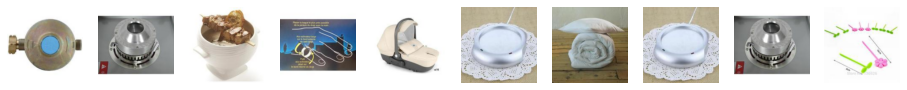

In [191]:
search_similar_image('2804_0.jpg', 10)

6172


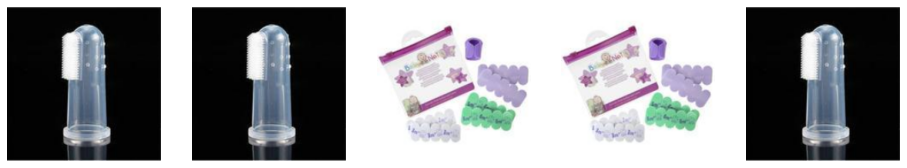

In [192]:
search_similar_image('6172_0.jpg', 5)